In [1]:
import numpy as np
import h5py
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import display
from PIL import Image
import ast
import time as tt

In [2]:
# get simulation time details
def convert_hecras_timedata(time_data):
    time_series = []
    for tstep in time_data:
        time_str = tstep.decode('UTF-8')  # Convert byte data to str
        time_stamp = datetime.strptime(time_str, '%d%b%Y %H:%M:%S')  # Convert to datetime
        time_series.append(time_stamp)  # Append timestep to timeseries

    time = np.array(time_series)  # Convert to numpy array
    return time

def get_timedata(path):
    hec = h5py.File(path, 'r')  # Open to read data
    # Get time data
    time_data = hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series'] \
        ['Time Date Stamp']

    time = convert_hecras_timedata(time_data)

    hec.close()  # Close

    return time

#### Read HDF file

In [4]:
hec_result_path = r"P:\Data_Transfer_USYD_Local\HEC_RAS_Results\Model_02_Events_99\Part_01_Events_60\Davis_Pipe_Model.p05.hdf"
hec = h5py.File(hec_result_path, 'r')
time_list = get_timedata(hec_result_path)
value = np.array(hec['Geometry']['2D Flow Areas'])[3]
value

np.str_('Davis')

### 1. Dynamic Features
#### 1.1 1D Node Features
##### To get the location of each 1D nodes, refer to the Nodes_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.1.1 Water Levels (units: fts)

In [6]:
WSE = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks'][value]['Nodes']['Water Surface'])
column_names = [str(i) for i in range(WSE.shape[1])]
WSE = pd.DataFrame(WSE, columns=column_names)
WSE.insert(0, "Time", time_list)
WSE = WSE.set_index('Time')
WSE

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,26.934290,25.744030,28.838373,27.345407,24.571077,26.546907,29.677227,28.644255,29.705898,31.828953,...,36.633331,36.133331,36.133331,34.633331,34.633331,28.789911,28.789911,38.298355,38.136578,23.000000
2025-10-02 00:05:00,26.934290,25.744030,28.838373,27.345407,24.571077,26.546907,29.677227,28.644255,29.705898,31.828953,...,36.633331,36.133331,36.133331,34.633331,34.633331,28.789911,28.789911,38.298355,38.136578,23.000000
2025-10-02 00:10:00,26.934290,25.744030,28.838373,27.345407,24.571077,26.546907,29.677227,28.644255,29.705898,31.828953,...,36.633331,36.133331,36.133331,34.633331,34.633331,28.789911,28.789911,38.298355,38.136578,23.000000
2025-10-02 00:15:00,26.934290,25.744030,28.838373,27.345407,24.571077,26.546907,29.677227,28.644255,29.705898,31.828953,...,36.633331,36.133331,36.133331,34.633331,34.633331,28.789911,28.789911,38.298355,38.136578,23.000000
2025-10-02 00:20:00,26.934290,25.744030,28.838373,27.345407,24.571077,26.546907,29.677227,28.644255,29.705898,31.828953,...,36.633331,36.133331,36.133331,34.633331,34.633331,28.789911,28.789911,38.298355,38.136578,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,36.782597,35.375034,38.905617,37.977913,33.965412,34.494434,35.238529,35.053032,38.950844,40.536404,...,42.245293,37.821941,37.835423,36.648647,36.648663,35.053497,35.053093,38.983997,38.983360,32.037491
2025-10-02 11:45:00,36.766457,35.359791,38.888805,37.962139,33.950226,34.462990,35.181087,35.002396,38.933506,40.522327,...,42.207253,37.782787,37.793877,36.629749,36.629734,35.002781,35.002380,38.966232,38.965584,32.037209
2025-10-02 11:50:00,36.750660,35.345097,38.872063,37.946545,33.935780,34.433456,35.127991,34.955173,38.916225,40.508247,...,42.171906,37.749397,37.758373,36.610859,36.610874,34.955574,34.955177,38.948326,38.947674,32.036938


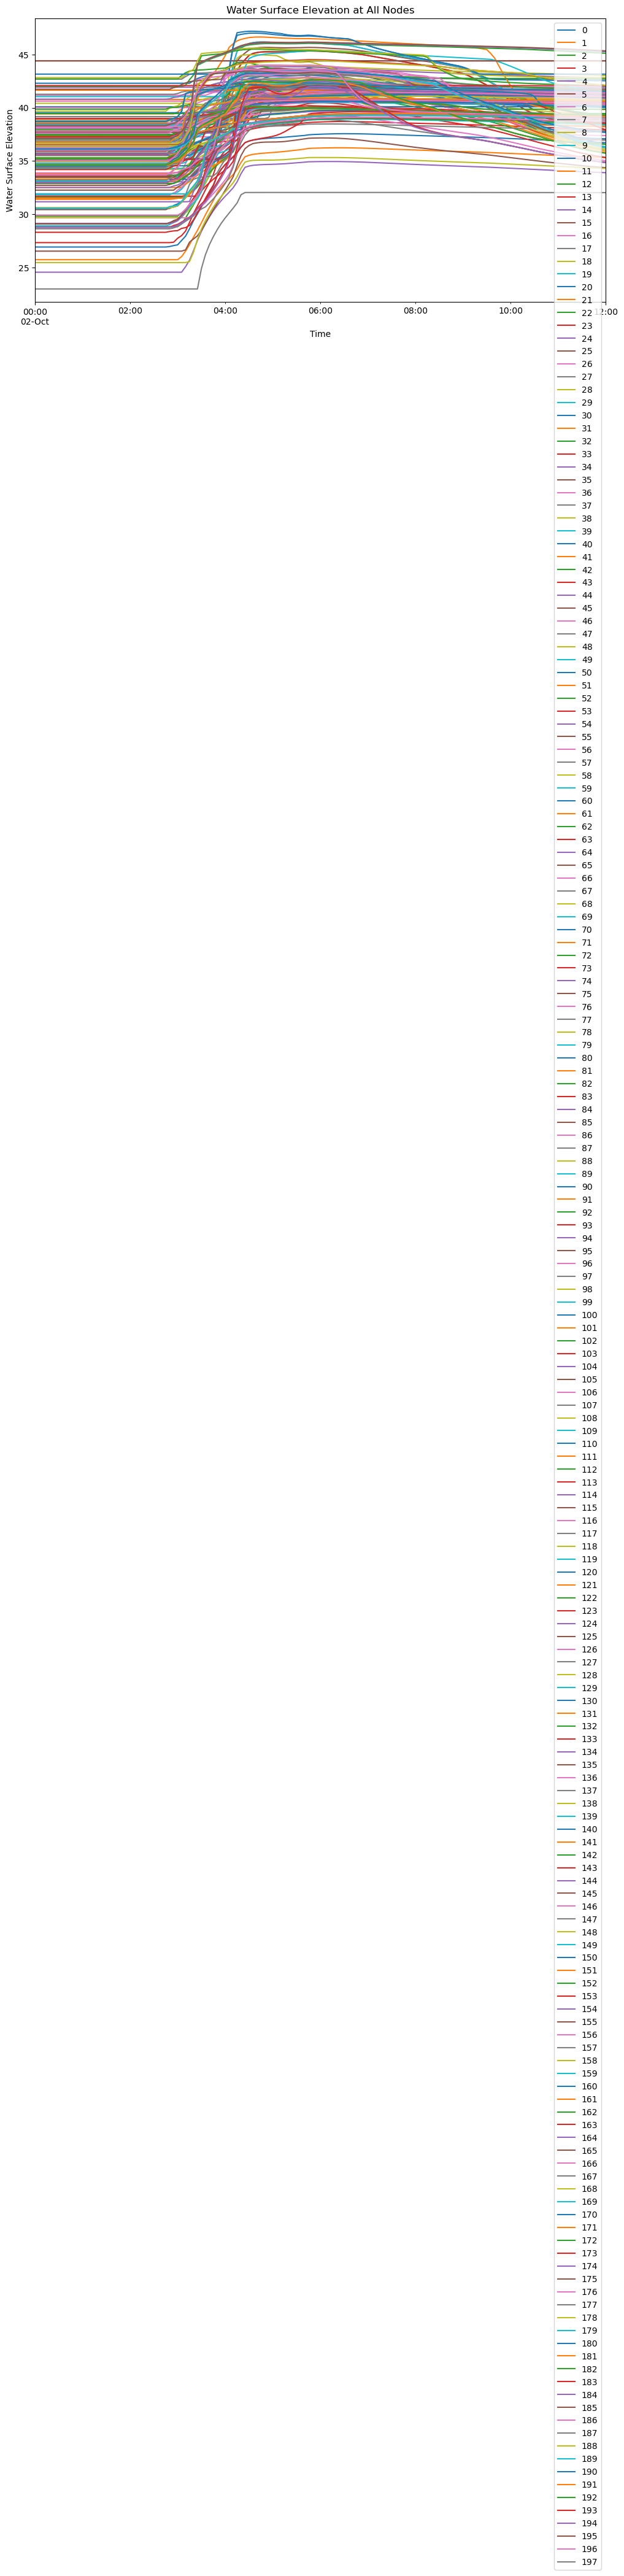

In [7]:
WSE.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Water Surface Elevation")
plt.title("Water Surface Elevation at All Nodes")
plt.show()

#### 1.1.2 Flow from 2D cells to 1D nodes (Units: ft^3/s)
##### To see the connections between 1D to 2D open Node1D_to_Node2D_Links.shp file

In [8]:
Inlet_Flow = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks'][value]['Nodes']['Drop Inlet Flow'])
column_names = [str(i) for i in range(Inlet_Flow.shape[1])]
Inlet_Flow = pd.DataFrame(Inlet_Flow, columns=column_names)
Inlet_Flow.insert(0, "Time", time_list)
Inlet_Flow = Inlet_Flow.set_index('Time')
Inlet_Flow

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.0
2025-10-02 00:05:00,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.0
2025-10-02 00:10:00,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.0
2025-10-02 00:15:00,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.0
2025-10-02 00:20:00,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,3.419720,-0.0,6.346758,5.332900,-0.0,-0.0,-0.0,0.0,6.636070,0.299381,...,0.661063,-0.0,0.777190,-0.0,0.007084,0.097932,0.010403,0.079220,-0.0,0.0
2025-10-02 11:45:00,3.357222,-0.0,6.332230,5.315490,-0.0,-0.0,-0.0,0.0,6.622297,0.272824,...,0.645165,-0.0,0.705410,-0.0,0.006569,0.094785,0.008926,0.077009,-0.0,0.0
2025-10-02 11:50:00,3.294501,-0.0,6.317680,5.298052,-0.0,-0.0,-0.0,0.0,6.608507,0.246097,...,0.629614,-0.0,0.635395,-0.0,0.006130,0.091678,0.007469,0.074968,-0.0,0.0


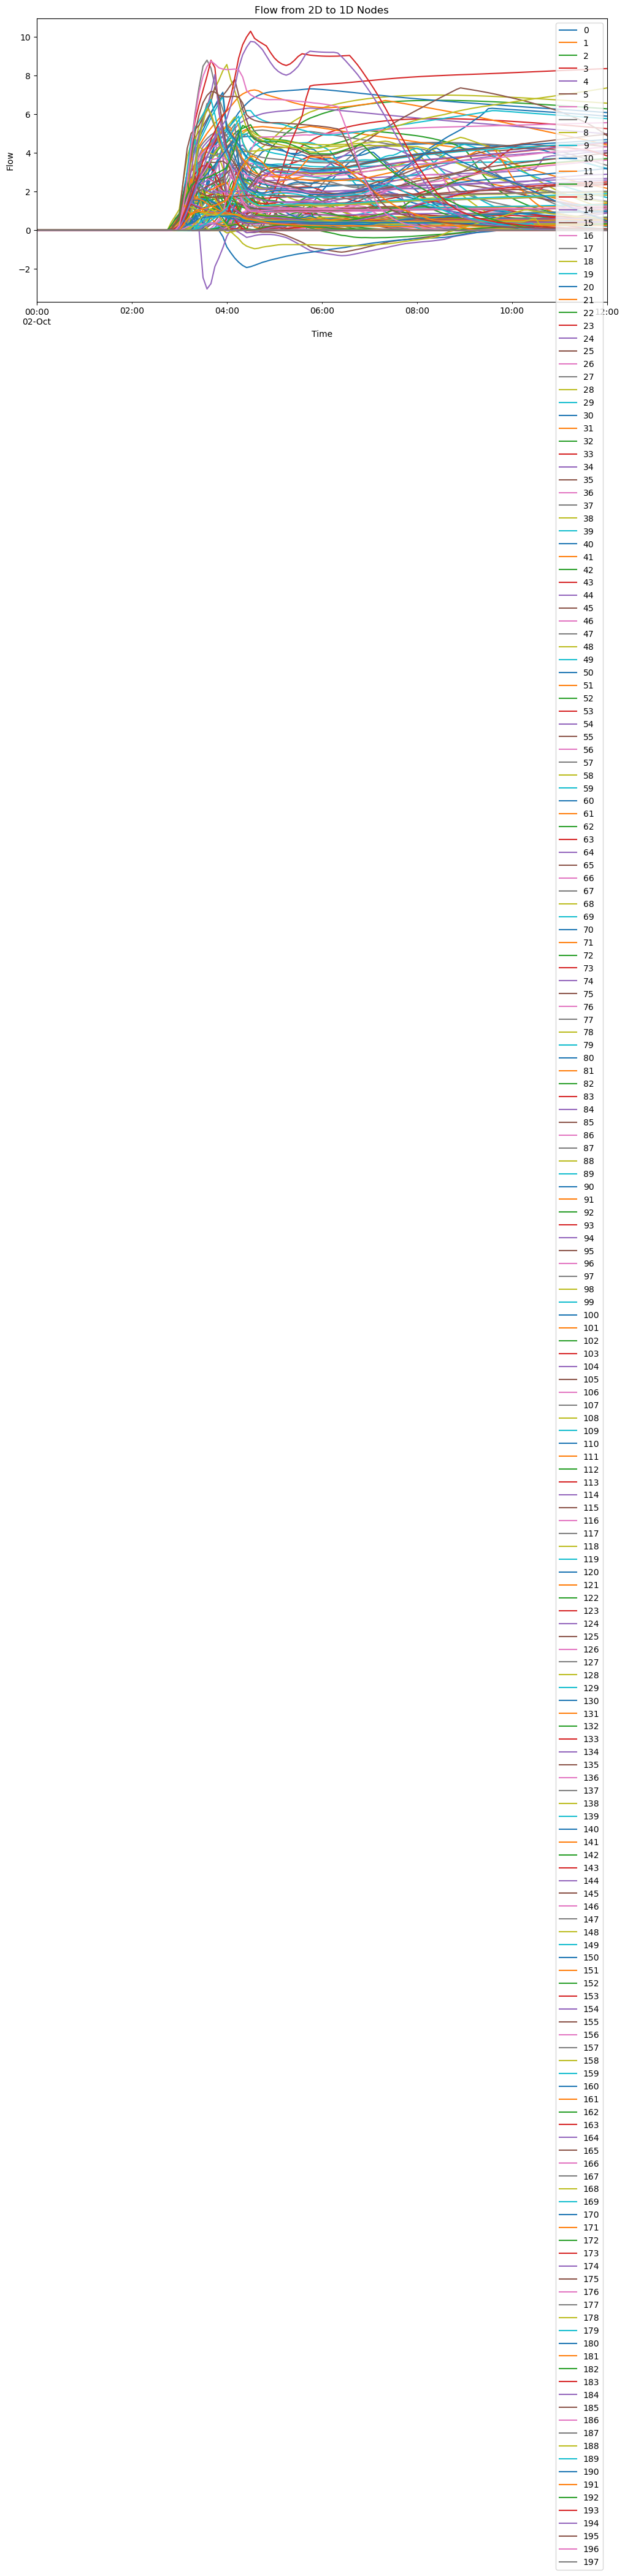

In [9]:
Inlet_Flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow from 2D to 1D Nodes")
plt.show()

#### 1.2 1D Link Features
##### To get the location of each 1D link, refer to the Links_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.2.1 Velocity (units: ft/s)

In [10]:
vel_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks'][value]['Pipes']['Vel DS'])
vel_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks'][value]['Pipes']['Vel US'])
vel = (vel_DS + vel_US)/2
column_names = [str(i) for i in range(vel.shape[1])]
vel = pd.DataFrame(vel, columns=column_names)
vel.insert(0, "Time", time_list)
vel = vel.set_index('Time')
vel

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,4.942121,2.965368,4.942183,2.281843,4.152510,1.899978,0.956533,2.154563,1.467709,1.876544,...,0.005169,0.636437,0.002246,0.007432,2.116102,0.087928,0.016081,0.102418,0.002380,3.482926
2025-10-02 11:45:00,4.942024,2.963632,4.942089,2.251862,4.153937,1.878598,0.951189,2.155101,1.460912,1.873528,...,0.004574,0.577577,0.001816,0.006913,2.085820,0.085530,0.015014,0.102473,0.002460,3.469713
2025-10-02 11:50:00,4.941619,2.961761,4.941682,2.223327,4.155097,1.858729,0.945707,2.155604,1.455986,1.871154,...,0.004100,0.520178,0.002265,0.006781,2.057014,0.082740,0.013641,0.102867,0.002533,3.456933


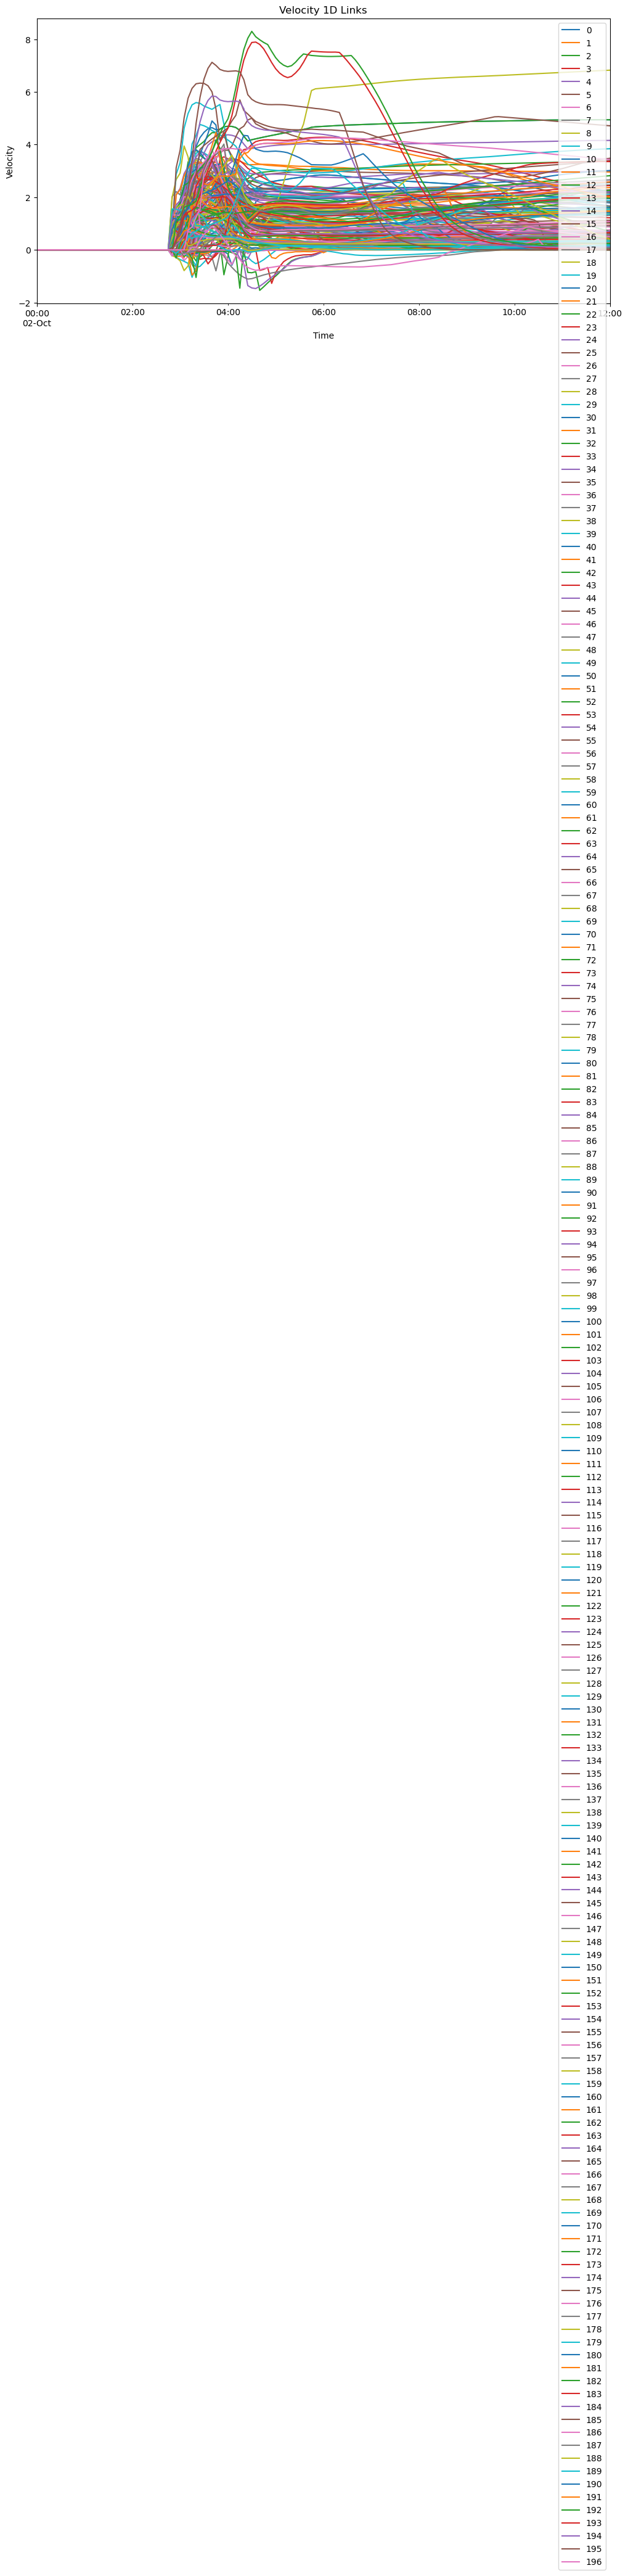

In [11]:
vel.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity 1D Links")
plt.show()

#### 1.2.2 Flow (Units: ft^3/s)

In [12]:
flow_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks'][value]['Pipes']['Pipe Flow DS'])
flow_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks'][value]['Pipes']['Pipe Flow US'])
flow = (flow_DS + flow_US)/2
column_names = [str(i) for i in range(flow.shape[1])]
flow = pd.DataFrame(flow, columns=column_names)
flow.insert(0, "Time", time_list)
flow = flow.set_index('Time')
flow

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,139.735168,83.843788,139.736938,64.517586,117.409462,52.818291,18.781479,42.304752,27.276321,32.211578,...,0.006343,0.781026,0.002756,0.009121,59.831367,0.107903,0.019735,0.082043,0.002104,221.574219
2025-10-02 11:45:00,139.732437,83.794724,139.734268,63.669884,117.449799,52.034302,18.676546,42.315308,26.843096,31.644695,...,0.005613,0.708794,0.002229,0.008484,58.975166,0.104961,0.018425,0.079866,0.002123,220.733627
2025-10-02 11:50:00,139.721008,83.741829,139.722778,62.863083,117.482613,51.293964,18.568924,42.325184,26.432400,31.115013,...,0.005032,0.638354,0.002780,0.008322,58.160702,0.101538,0.016739,0.077922,0.002132,219.920624


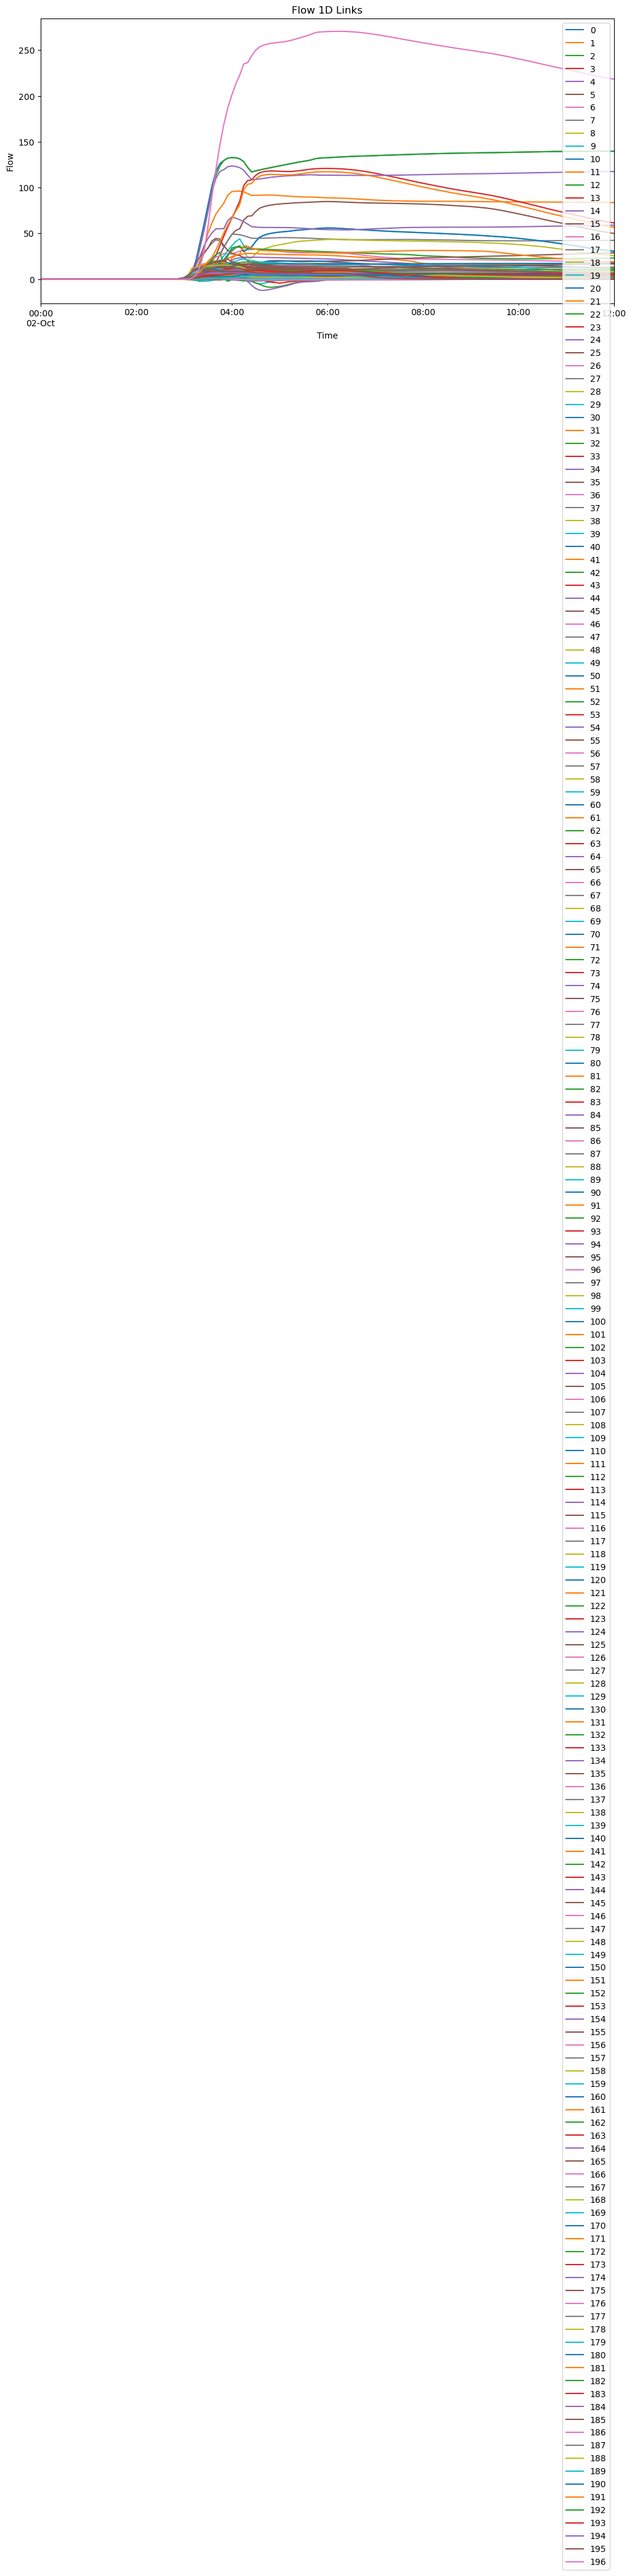

In [13]:
flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow 1D Links")
plt.show()

#### 1.3 2D Node features
##### To see node locations open and see Nodes_2D.shp, type = boundary are boundary nodes
#### 1.3.1 Water Level (Units: ft)

In [14]:
wl=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Water Surface'])
column_names = [str(i) for i in range(wl.shape[1])]
df = pd.DataFrame(wl, columns=column_names)
df.insert(0, "Time", time_list)
df = df.set_index('Time')
df

,0,1,2,3,4,5,6,7,8,9,...,4534,4535,4536,4537,4538,4539,4540,4541,4542,4543
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,46.875000,46.883480,47.049545,48.156250,44.121159,43.853256,46.636696,46.825287,44.718933,39.414070,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
2025-10-02 00:05:00,46.875000,46.883480,47.049545,48.156250,44.121159,43.853256,46.636696,46.825287,44.718933,39.414070,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
2025-10-02 00:10:00,46.875000,46.883480,47.049545,48.156250,44.121159,43.853256,46.636696,46.825287,44.718933,39.414070,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
2025-10-02 00:15:00,46.875000,46.883480,47.049545,48.156250,44.121159,43.853256,46.636696,46.825287,44.718933,39.414070,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
2025-10-02 00:20:00,46.875000,46.883480,47.049545,48.156250,44.121159,43.853256,46.636696,46.825287,44.718933,39.414070,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,47.008022,47.081490,47.814026,48.236275,46.278965,46.278965,47.259430,47.259548,46.278965,46.278965,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,43.726753,43.901306,56.31192,47.600948
2025-10-02 11:45:00,47.006718,47.081425,47.813377,48.235737,46.279758,46.279758,47.255184,47.255302,46.279758,46.279758,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,43.725758,43.901306,56.31192,47.600948
2025-10-02 11:50:00,47.005451,47.081367,47.812752,48.235210,46.280533,46.280533,47.251034,47.251148,46.280533,46.280533,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,43.724785,43.901306,56.31192,47.600948


#### 1.3.2 Water Volume (ft^3)

In [15]:
vol_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Cell Volume'])
column_names = [str(i) for i in range(vol_data.shape[1])]
vol_df = pd.DataFrame(vol_data, columns=column_names)
vol_df.insert(0, "Time", time_list)
vol_df = vol_df.set_index('Time')
vol_df

,0,1,2,3,4,5,6,7,8,9,...,4534,4535,4536,4537,4538,4539,4540,4541,4542,4543
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
2025-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
2025-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
2025-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
2025-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,42.875183,43.901306,56.31192,47.600948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,33.919334,35.714256,2357.563721,25.448389,2161.633301,1620.194702,802.562256,715.983276,667.987671,19845.259766,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,43.726753,43.901306,56.31192,47.600948
2025-10-02 11:45:00,33.585911,35.702969,2351.133789,25.277212,2164.486084,1621.176270,789.978271,700.696960,669.260620,19850.390625,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,43.725758,43.901306,56.31192,47.600948
2025-10-02 11:50:00,33.263176,35.692513,2344.900635,25.109615,2167.273193,1622.135132,777.677124,685.755920,670.504028,19855.400391,...,44.323414,48.778889,48.21875,47.8125,43.313427,41.365299,43.724785,43.901306,56.31192,47.600948


#### 1.3.3 Rainfall (Units: inch)

In [16]:
# rainfall is cumulative; convert to DataFrame
rainfall = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']
                    ['Unsteady Time Series']['2D Flow Areas'][value]
                    ['Cell Cumulative Precipitation Depth'])

column_names = [str(i) for i in range(rainfall.shape[1])]
rain_df = pd.DataFrame(rainfall, columns=column_names)
rain_df.insert(0, "Time", time_list)
rain_df.set_index("Time", inplace=True)

# 🔻 Compute incremental rainfall (difference between time steps)
rain_increment = rain_df.diff()    # difference between rows
rain_increment.iloc[0] = rain_df.iloc[0]   # first timestep stays as-is

rain_increment

,0,1,2,3,4,5,6,7,8,9,...,4534,4535,4536,4537,4538,4539,4540,4541,4542,4543
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


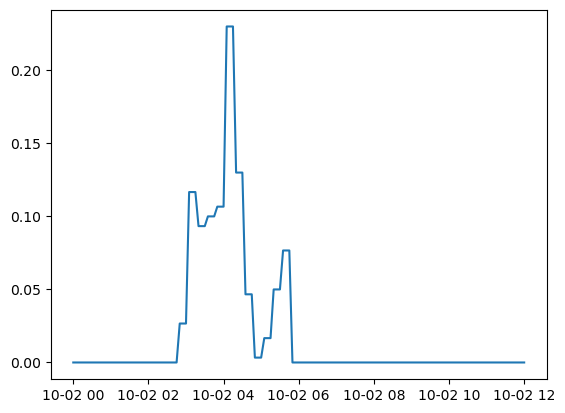

In [17]:
plt.plot(rain_increment['1'])

#### 1.4 2D Link Features
#### 1.4.1 Velocity (Units: ft/s)

In [18]:
vel=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Face Velocity'])
column_names = [str(i) for i in range(vel.shape[1])]
vel_df = pd.DataFrame(vel, columns=column_names)
vel_df.insert(0, "Time", time_list)
vel_df = vel_df.set_index('Time')
vel_df

,0,1,2,3,4,5,6,7,8,9,...,10111,10112,10113,10114,10115,10116,10117,10118,10119,10120
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:05:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:10:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:15:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:20:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.001889,0.0,0.0,0.0,-0.0,0.030578,0.000078,-0.000378,0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:45:00,0.001832,0.0,0.0,0.0,-0.0,0.030134,0.000076,-0.000370,0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:50:00,0.001779,0.0,0.0,0.0,-0.0,0.029706,0.000075,-0.000364,0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.4.2 Flow (Units: ft^3/s)

In [19]:
flow_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Face Flow'])
column_names = [str(i) for i in range(flow_data.shape[1])]
flow_df = pd.DataFrame(flow_data, columns=column_names)
flow_df.insert(0, "Time", time_list)
flow_df = flow_df.set_index('Time')
flow_df

,0,1,2,3,4,5,6,7,8,9,...,10111,10112,10113,10114,10115,10116,10117,10118,10119,10120
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-02 00:00:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:05:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:10:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:15:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 00:20:00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-02 11:40:00,0.000039,0.0,0.0,0.0,0.0,0.001169,0.012235,-0.015533,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:45:00,0.000036,0.0,0.0,0.0,0.0,0.001129,0.011996,-0.015210,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-02 11:50:00,0.000034,0.0,0.0,0.0,0.0,0.001092,0.011807,-0.014961,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Notes
##### Open each shapefile in Geometry folder in QGIS to visualise the numerical computational mesh/nodes/links. 
##### You may see number of nodes in Nodes_2D.shp is higher than the Mesh_2D.shp
##### This is because HEC-RAS adds additional cells called ghost cells. Except the boundary nodes all other ghost cells can be removed.
##### Similarly all links connecting to or starting from ghost cells can be removed, except those connected to boundary nodes.
##### Boundary nodes are given as type = boundary in Nodes_2D.shp file
##### Following code gives all ghost cell indexes including boundary nodes


In [20]:
# identify ghost cells
min_elevation = np.array(hec['Geometry']['2D Flow Areas'][value]['Cells Minimum Elevation']) 
Ghost_cells_idx = np.where(np.isnan(min_elevation))[0]
Ghost_cells_idx

array([4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309,
       4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 4320,
       4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331,
       4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342,
       4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353,
       4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364,
       4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375,
       4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386,
       4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397,
       4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408,
       4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419,
       4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430,
       4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441,
       4442, 4443, 4444, 4445, 4446, 4447, 4448, 44